In [141]:
import pandas as pd
import sqlite3
import json

In [142]:
con = sqlite3.connect('/Users/damoncrockett/Dropbox/thinkpad_desktop_2/DSD_sqlite_db/invoices.db')
cur = con.cursor()

In [4]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    count +=1
count

474190

In [5]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'InvoiceId' in d:
        count +=1
count

472747

In [6]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'Status' in d and d['Status']:
        count +=1
count

472747

In [137]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'PaidDate' in d:
        count +=1
count

472747

In [58]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'CustomerFirmName' in d and d['CustomerFirmName']:
        count +=1
count

297571

In [59]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'TotalAmount' in d and d['TotalAmount']:
        count +=1
count

458743

In [10]:
count = 0
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'ProjectDetails' in d and d['ProjectDetails']:
        count +=1
count

472706

In [13]:
lengths = []
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'ProjectDetails' in d:
        n = len(d['ProjectDetails'])
        lengths.append(n)

In [15]:
from collections import Counter

In [16]:
Counter(lengths)

Counter({1: 468508, 2: 2391, 3: 644, 4: 362, 5: 242, 6: 128, 7: 85, 8: 80, 9: 53, 0: 41, 10: 31, 11: 27, 13: 17, 12: 13, 16: 11, 19: 11, 20: 11, 26: 10, 14: 9, 18: 9, 21: 9, 15: 6, 17: 6, 25: 5, 23: 4, 22: 3, 33: 3, 36: 3, 58: 3, 63: 3, 24: 2, 29: 2, 39: 2, 59: 2, 62: 2, 27: 1, 28: 1, 32: 1, 42: 1, 44: 1, 46: 1, 47: 1, 60: 1, 72: 1})

In [143]:
keys = ['InvoiceId',
        'Status',
        'TotalAmount']

In [145]:
def gen(cur):
    for row in cur.execute('SELECT data FROM json'):
        d = json.loads(str(row[0]).decode('zlib'))
        if ('InvoiceId' in d and
            d['InvoiceId'] and
            'Status' in d and
            d['Status'] and 
            'TotalAmount' in d and
            d['TotalAmount']):
            yield {key:d[key] for key in keys}

In [146]:
df = pd.DataFrame(gen(cur))

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458743 entries, 0 to 458742
Data columns (total 3 columns):
InvoiceId      458743 non-null int64
Status         458743 non-null object
TotalAmount    458743 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.0+ MB


In [148]:
%matplotlib inline

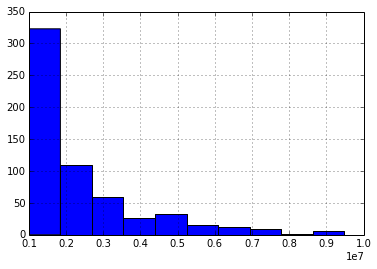

In [149]:
df[(df.TotalAmount < 10000000) & (df.TotalAmount > 1000000)].TotalAmount.hist()

In [150]:
df.TotalAmount.max()

1000007249.41

In [151]:
df[df.TotalAmount > 1000000000]

,InvoiceId,Status,TotalAmount
437492,559779,Estimated,1.000007e+09
437523,559813,Estimated,1.000007e+09


In [152]:
df[df.TotalAmount < -100000].Status.value_counts()

Estimated    8
Voided       5
dtype: int64

In [153]:
df.TotalAmount.min()

-531216.0

In [154]:
sum(df.TotalAmount[(df.TotalAmount > 0) & (df.Status == 'Paid')])

956598541.3100009

In [155]:
len(df.index[df.TotalAmount>0])

454650

In [156]:
payday = []
for row in cur.execute('SELECT data FROM json'):
    d = json.loads(str(row[0]).decode('zlib'))
    if 'TotalAmount' in d and d['TotalAmount']:
        if d['PaidDate']:
            payday.append(d['PaidDate'])
        else:
            payday.append('nan')

In [157]:
df['PaidDate'] = payday

In [158]:
con = sqlite3.connect('/Users/damoncrockett/Dropbox/thinkpad_desktop_2/DSD_sqlite_db/projects.db')
cur = con.cursor()

In [159]:
def gen(cur):
    for row in cur.execute('SELECT data FROM json'):
        d = json.loads(str(row[0]).decode('zlib'))
        if 'Invoices' in d and d['Invoices']:
            n = len(d['Invoices'])
            for i in range(n):
                yield d['Invoices'][i]

In [160]:
dd = pd.DataFrame(gen(cur))

In [161]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472132 entries, 0 to 472131
Data columns (total 4 columns):
InvoiceId           472132 non-null int64
InvoiceIssueDate    472132 non-null object
InvoiceStatus       472132 non-null object
ProjectId           472132 non-null int64
dtypes: int64(2), object(2)
memory usage: 18.0+ MB


In [162]:
len(dd.InvoiceId.value_counts())

461523

In [163]:
df.set_index('InvoiceId',inplace=True)

In [164]:
dd = dd.join(df,on='InvoiceId')

In [165]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472132 entries, 0 to 472131
Data columns (total 7 columns):
InvoiceId           472132 non-null int64
InvoiceIssueDate    472132 non-null object
InvoiceStatus       472132 non-null object
ProjectId           472132 non-null int64
Status              456650 non-null object
TotalAmount         456650 non-null float64
PaidDate            456650 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 28.8+ MB


In [166]:
len(dd.index[dd.Status!=dd.InvoiceStatus])

15491

In [167]:
del dd['Status']

In [168]:
dd.head()

,InvoiceId,InvoiceIssueDate,InvoiceStatus,ProjectId,TotalAmount,PaidDate
0,544002,2014-04-14T10:52:59,Estimated,1001,60,nan
1,340152,2010-04-29T11:37:36,Estimated,1001,42,nan
2,107465,2005-06-28T14:02:56,Paid,1040,3000,2005-06-28T14:19:44
3,107464,2005-06-28T14:01:40,Paid,1041,1700,2005-06-28T14:22:05
4,138746,2006-02-06T12:25:07,Paid,1096,500,2006-02-06T13:28:54


In [169]:
del dd['InvoiceIssueDate']

In [170]:
dd.head()

,InvoiceId,InvoiceStatus,ProjectId,TotalAmount,PaidDate
0,544002,Estimated,1001,60,nan
1,340152,Estimated,1001,42,nan
2,107465,Paid,1040,3000,2005-06-28T14:19:44
3,107464,Paid,1041,1700,2005-06-28T14:22:05
4,138746,Paid,1096,500,2006-02-06T13:28:54


In [171]:
len(dd.ProjectId.value_counts())

226704

In [172]:
dd.to_csv('/Users/damoncrockett/vosd.org/215-opendsd/tables/invoice_table_basic.csv',index=False)